# Sounding Spirit Checklist Visualizations

The purpose of this notebook is to practice using Python to visualize patterns in the Checklist data. 

In [110]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline

import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# import seaborn library (wrapper of matplotlib)
import seaborn as sns

# import regular expressions to check date
import re

## Load Data

In [111]:
filename = ('dataverse_files/Checklist of Southern Sacred Music Imprints, 1850–1925.csv')
df = pd.read_csv(filename)

In [112]:
df.head()

,Title,Responsibility,Associated Places,Publication,Manufacture,Distribution,Date,Approximate Date,Copyright,Edition/Imprint,...,Spirituals,Sunday School Use,Tract Society Publication,Attestations,Source for Record,Emory Holdings,MTSU Holdings,SBTS Holdings,UK Holdings,Notes
0,Timbrel : a collection of sacred music,"Baker, B. F.; Woodbury, I. B.","New York, NY; Boston, MA; Cincinnati, OH; St. ...",Huntington and Savage; W. J. Reynolds and Co.;...,NaN,NaN,1850,NaN,1848,NaN,...,NaN,NaN,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN
1,"Sacred melodeon, The : containing a great vari...","Hayden, A. S.","Cincinnati, OH","Moore, Wilstach, Keys and Co.",NaN,NaN,1858,NaN,1849,NaN,...,NaN,NaN,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN
2,"Sacred melodeon, The : containing a great vari...","Hayden, A. S.","Cincinnati, OH","Moore, Wilstach, Keys and Co.",NaN,NaN,1860,NaN,1849,NaN,...,NaN,NaN,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN
3,"Sabbath school offering, or, true stories and ...","Martin, Mrs.; Summers, Thomas O.","Nashville, TN","Methodist Episcopal Church, South",E. Stevenson and F. A. Owen,NaN,1855,NaN,1854,NaN,...,NaN,Y,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN
4,Songs for the Sabbath school and vestry : desi...,"Williams, B. W.","Boston, MA; Chicago, IL; Cincinnati, OH",Henry Hoyt; William Tomlinson; George Crosby,NaN,NaN,1859,NaN,1858,NaN,...,NaN,Y,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 52 columns):
Title                            2265 non-null object
Responsibility                   2265 non-null object
Associated Places                2264 non-null object
Publication                      2259 non-null object
Manufacture                      218 non-null object
Distribution                     47 non-null object
Date                             2265 non-null object
Approximate Date                 1102 non-null object
Copyright                        886 non-null object
Edition/Imprint                  335 non-null object
Pagination                       2264 non-null object
Height                           2265 non-null object
Width                            378 non-null object
Denomination                     1020 non-null object
Notation                         2265 non-null object
Language                         2265 non-null object
Content                          22

## Histogram of Dates

Let's start with a simple histogram showing the number of volumes selected for each year.

In [114]:
dates = df.loc[:, 'Date'].values

In [115]:
dates

array(['1850', '1858', '1860', ..., '1898', '1907', '187?'], dtype=object)

Text(0.5, 0, 'Year')

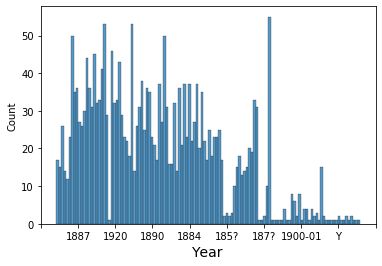

In [116]:
p = sns.histplot(data=df, x="Date")
p.xaxis.set_major_locator(ticker.LinearLocator(10)) # Display every tenth label
plt.xlabel('Year', fontsize=14)

So there's a lot wrong with this plot. Obviously the dates are not all four-digit years and that causes problems. Can we clean the data and make a better plot?

In [117]:
# Make a list of problem values
bad_dates = []
for value in np.unique(dates):
    if not re.match(r'^\d\d\d\d$', value):
        bad_dates.append(value)

# Replace problem values with None
df.loc[df['Date'].isin(bad_dates), 'Date'] = None

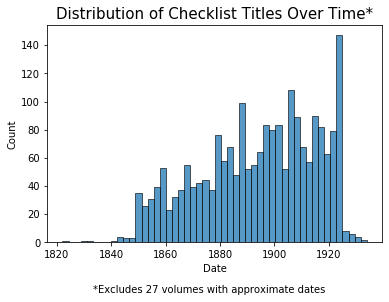

In [123]:
dates = pd.to_numeric(df['Date'])
p = sns.histplot(dates, bins=50)
caption = '*Excludes 27 volumes with approximate dates'
plt.figtext(.5, -.05, caption, wrap=True, horizontalalignment='center', fontsize=10)
p.set_title('Distribution of Checklist Titles Over Time*', fontsize=15)
plt.tight_layout
fig = p.get_figure()
fig.savefig('plots/date_histogram.png', bbox_inches='tight')

In [119]:
len(bad_dates)

27